1. Tentukan Library yang digunakan

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

2. Load Dataset

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')

In [3]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes_dataset.shape

(768, 9)

In [6]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [7]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


3. Memisahkan Data atribut dan Label

In [8]:
X = diabetes_dataset.drop(columns='Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [9]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [10]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


4. Memisahkan Data Training dan Data Testing

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=20)

In [12]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


5. Membuat Data Latih Menggunakan Algoritma Naive Bayes

In [13]:
classifier = GaussianNB()

In [14]:
classifier.fit(X_train, Y_train)

GaussianNB()

6. Membuat Model Evaluasi Untuk Mengukur Tingkat Akurasi

In [15]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [16]:
print('Akurasi data training adalah = ', training_data_accuracy)

Akurasi data training adalah =  0.750814332247557


In [17]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [18]:
print('Akurasi data testing adalah = ', test_data_accuracy)

Akurasi data testing adalah =  0.7857142857142857


In [19]:
Y_pred = classifier.predict(X_test)

In [20]:
cm = confusion_matrix(Y_test, Y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Negative', 'Positive'])
ac = accuracy_score(Y_test,Y_pred) 

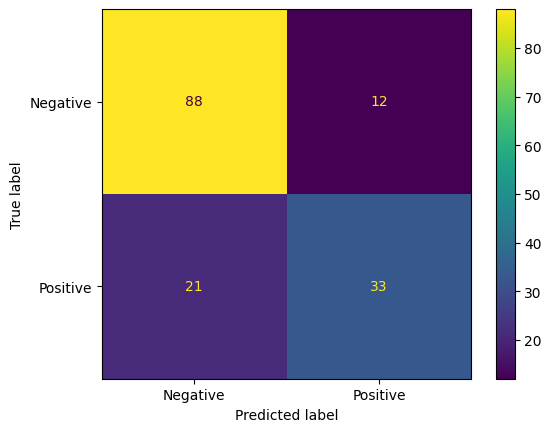

In [21]:
cmd.plot()

7. Membuat Model Prediksi

In [22]:
##input_data = (6, 148, 72, 35, 0, 33.6, 0.627, 50)

input_data = (2, 85, 40, 28, 0, 23.3, 0.167, 30)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1, -1)

prediction = classifier.predict(input_data_reshape)

print(prediction)

if (prediction[0] == 0):
    print('Pasien Tidak Terkena Diabetes')
else:
    print('Pasien Terkena Diabetes')
    
print('Akurasi data training = ', training_data_accuracy)

print('Akurasi data testing = ', test_data_accuracy)

[0]
Pasien Tidak Terkena Diabetes
Akurasi data training =  0.750814332247557
Akurasi data testing =  0.7857142857142857


c:\Users\Kiki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


8. Simpan Model

In [23]:
import pickle

In [24]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))